In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [76]:
data=pd.read_csv(r"C:\D\Amitt\session\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [77]:
data.select_dtypes(include=['object']).nunique()

Gender    2
dtype: int64

In [78]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [80]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

SVM

In [81]:
from sklearn.svm import SVC
sv_classifier = SVC(kernel='linear',random_state=0)
sv_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [82]:
y_pred = sv_classifier.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.85

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameters=[
    {'C':[1,10,100,3,5],'kernel':['linear']},
    {'C':[1,30,10,7,9],'kernel':['rbf'],
    'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
]

In [86]:
grid_search=GridSearchCV(estimator=sv_classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1
                        )
grid_search=grid_search.fit(X_train,y_train)

In [87]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005266,0.000549,0.001900,0.000168,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.833333,0.8,...,0.9,0.733333,0.866667,0.800000,0.766667,0.9,0.833333,0.830000,0.052599,50
1,0.009622,0.002514,0.002189,0.000515,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.833333,0.8,...,0.9,0.733333,0.866667,0.833333,0.766667,0.9,0.833333,0.833333,0.051640,46
2,0.026992,0.011027,0.001788,0.000629,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.833333,0.8,...,0.9,0.733333,0.866667,0.833333,0.766667,0.9,0.833333,0.833333,0.051640,46
3,0.005629,0.001304,0.001913,0.000834,3,linear,NaN,"{'C': 3, 'kernel': 'linear'}",0.833333,0.8,...,0.9,0.733333,0.866667,0.833333,0.766667,0.9,0.833333,0.833333,0.051640,46
4,0.010067,0.006769,0.005070,0.010071,5,linear,NaN,"{'C': 5, 'kernel': 'linear'}",0.833333,0.8,...,0.9,0.733333,0.866667,0.833333,0.766667,0.9,0.833333,0.833333,0.051640,46


In [88]:
grid_mean_score=pd.DataFrame(grid_search.cv_results_)[['mean_test_score','std_test_score','params']]

In [89]:
accuracy=grid_search.best_score_
print(accuracy)
grid_search.best_params_

0.9100000000000001


{'C': 30, 'gamma': 0.2, 'kernel': 'rbf'}

In [90]:
grid_mean_scores=grid_search.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.83       0.83333333 0.83333333 0.83333333 0.83333333 0.89
 0.89333333 0.90333333 0.90333333 0.90333333 0.90333333 0.90333333
 0.90333333 0.90666667 0.90333333 0.91       0.90666667 0.90666667
 0.89666667 0.89666667 0.89666667 0.89       0.88333333 0.9
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89
 0.89       0.89333333 0.89666667 0.90333333 0.91       0.91
 0.91       0.90333333 0.9        0.89333333 0.89       0.89666667
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89333333
 0.89       0.89333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

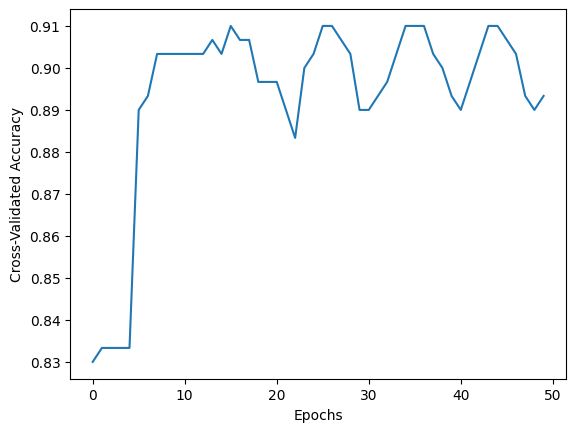

In [91]:
plt.plot(grid_mean_scores)
plt.xlabel('Epochs')
plt.ylabel('Cross-Validated Accuracy')